<a href="https://colab.research.google.com/github/AyushUnleashed/logo-avatars-pipeline/blob/main/Logo_avatars_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div align="justify" markdown=1>

# Logo Avatars Colab Notebook || Github - @ayushunleashed

Tired of boring logos, use Logo Avatars to generate creative logos  <br>
<br>
*Environment*: Google Colab, T4 GPU compatible.<br>
*Function*: Transforms basic logos into creative avatars.<br>
*Tech Stack*: Utilizes Custom Stable Diffusion 1.5 model and Canny Control Net.<br>
*Output*: Generates high-res, unique logo avatars. 😃<br>

---

### Make Sure to follow me:

[![Github](https://img.shields.io/badge/GitHub-100000?style=for-the-badge&logo=github&logoColor=white)](https://github.com/AyushUnleashed/logo-avatars-pipeline)
[![MyWebsite](https://img.shields.io/badge/my-website-000000%7D?style=for-the-badge&logoColor=white)](http://ayushunleashed.com)
[![Twitter URL](https://img.shields.io/twitter/url/https/twitter.com/ayushunleashed.svg?style=social&label=Follow%20%40ayushunleashed)](https://twitter.com/ayushunleashed)


</div>

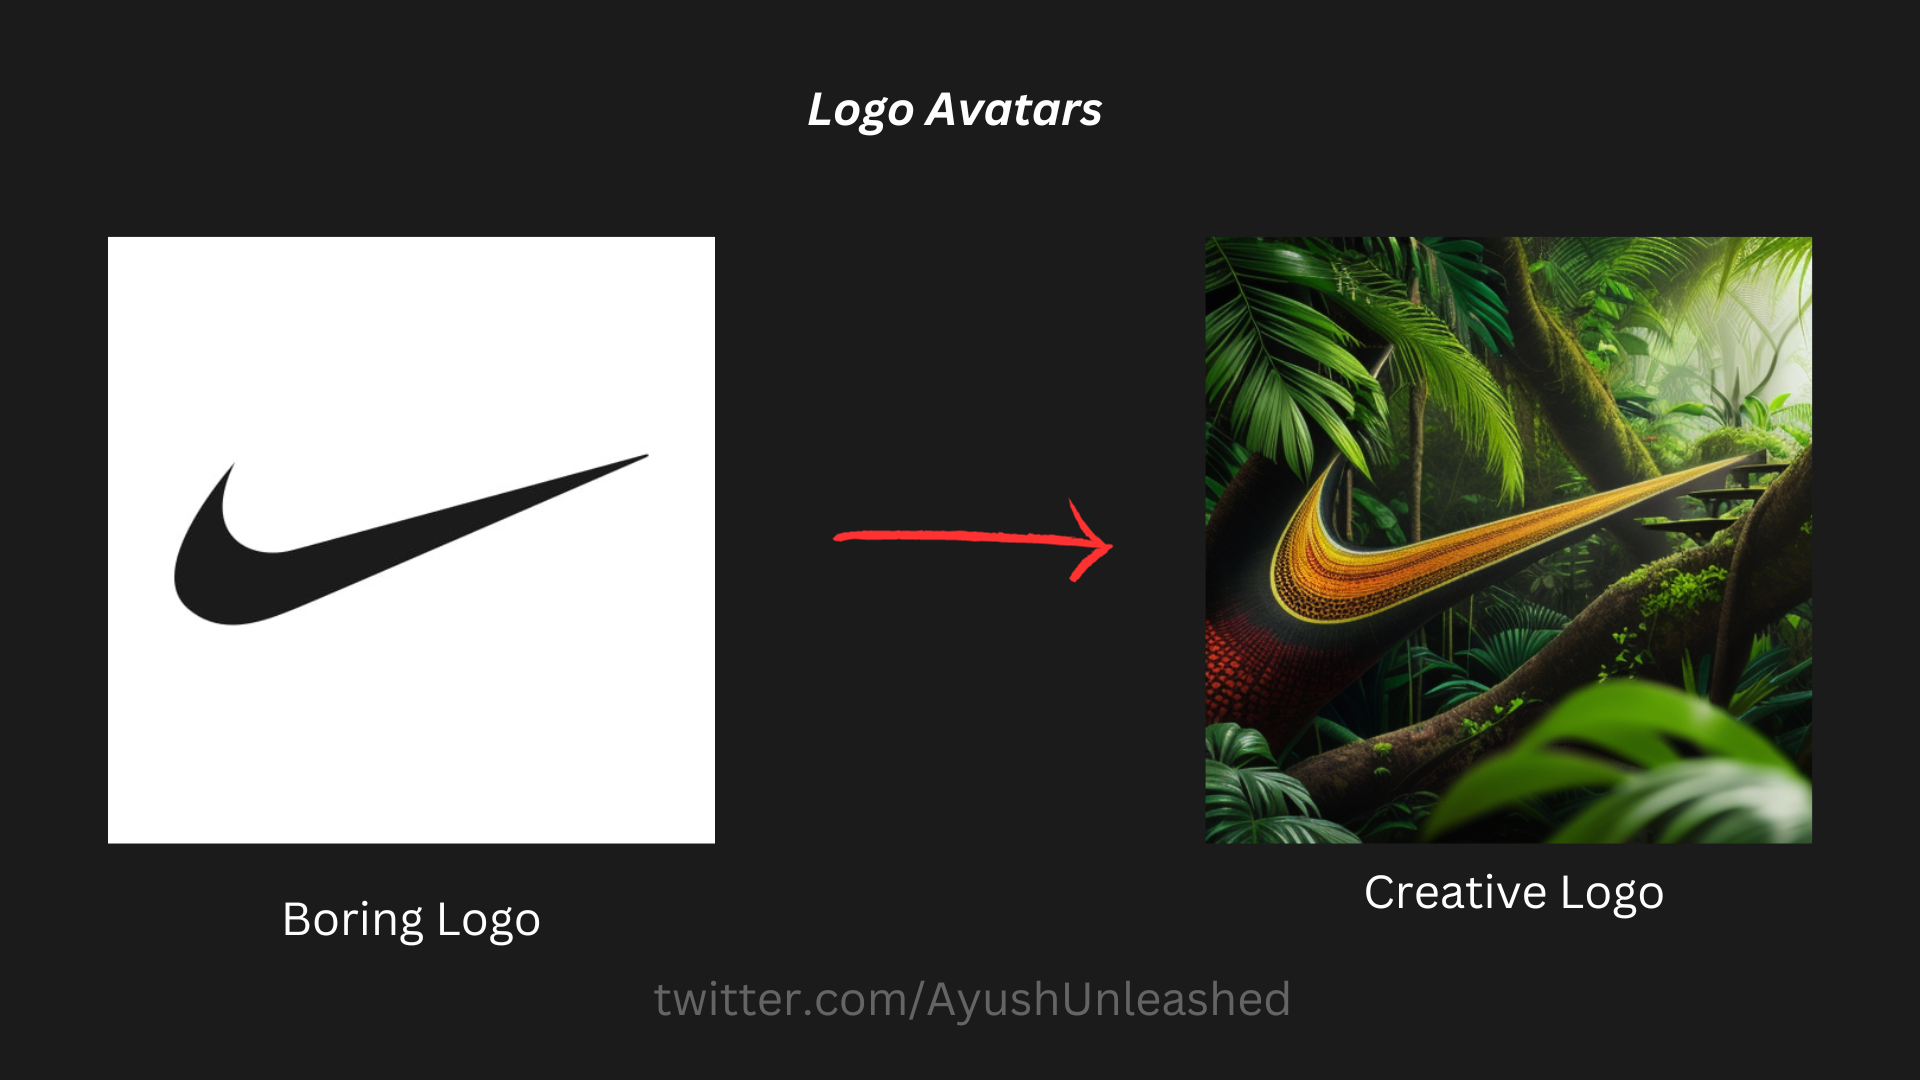

In [ ]:
# @title Installing requirements

!pip install --quiet --upgrade accelerate
!pip install git+https://github.com/huggingface/diffusers.git@main
!pip install controlnet_hinter==0.0.5

  Cloning https://github.com/huggingface/diffusers.git (to revision main) to /tmp/pip-req-build-ihopw7f6
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/diffusers.git /tmp/pip-req-build-ihopw7f6
  Resolved https://github.com/huggingface/diffusers.git to commit 774f5c45817805546ae5eb914c175d4fe72dcfe9
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 330.3/330.3 kB 2.3 MB/s eta 0:00:00
  Created wheel for diffusers: filename=diffusers-0.26.0.dev0-py3-none-any.whl size=1837810 sha256=16b554656b4a164122608d96878db52d9ce4dc47c15159970aa1c6c9d855bbb9
  Stored in directory: /tmp/pip-ephem-wheel-cache-6mpo_w0_/wheels/2f/e1/9c/c4e22972ee698b020d29ed7cc914d898247d01e302f25df1a4
Successfully built diffusers
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.20.1
    Uninstalling huggingface

In [ ]:
# @title Setting up the Control net map

import controlnet_hinter
# Mapping for ControlNet Model path and hinter function
CONTROLNET_MAPPING = {
    "canny_edge": {
        "model_id": "lllyasviel/sd-controlnet-canny",
        "hinter": controlnet_hinter.hint_canny
    },
    "pose": {
        "model_id": "lllyasviel/sd-controlnet-openpose",
        "hinter": controlnet_hinter.hint_openpose
    },
    "depth": {
        "model_id": "lllyasviel/sd-controlnet-depth",
        "hinter": controlnet_hinter.hint_depth
    },
    "scribble": {
        "model_id": "lllyasviel/sd-controlnet-scribble",
        "hinter": controlnet_hinter.hint_scribble,
    },
    "segmentation": {
        "model_id": "lllyasviel/sd-controlnet-seg",
        "hinter": controlnet_hinter.hint_segmentation,
    },
    "normal": {
        "model_id": "lllyasviel/sd-controlnet-normal",
        "hinter": controlnet_hinter.hint_normal,
    },
    "hed": {
        "model_id": "lllyasviel/sd-controlnet-hed",
        "hinter": controlnet_hinter.hint_hed,
    },
    "hough": {
        "model_id": "lllyasviel/sd-controlnet-mlsd",
        "hinter": controlnet_hinter.hint_hough,
    }
}

In [ ]:
# @title Loading The Pipeline

from diffusers import DiffusionPipeline, LCMScheduler,DDIMScheduler
from diffusers import AutoPipelineForText2Image, StableDiffusionControlNetPipeline, ControlNetModel
import torch
from diffusers.utils import load_image


# pipeline loading code:

# Stable diffusion base model
base_model_path =  "digiplay/Juggernaut_final"

pipe=None
torch.cuda.empty_cache()
device = "cuda"

controlnet_type = "canny_edge"  # or other types depending on your requirement

# Loading the base model with ControlNet
controlnet = ControlNetModel.from_pretrained(CONTROLNET_MAPPING[controlnet_type]["model_id"], torch_dtype=torch.float16).to(device)
pipe = StableDiffusionControlNetPipeline.from_pretrained(base_model_path,
                                                         controlnet=controlnet,
                                                         torch_dtype=torch.float16,
                                                         ).to(device)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/920 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/1.45G [00:00<?, ?B/s]

model_index.json:   0%|          | 0.00/593 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/520 [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/4.58k [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/427 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/737 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/1.69k [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/582 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(


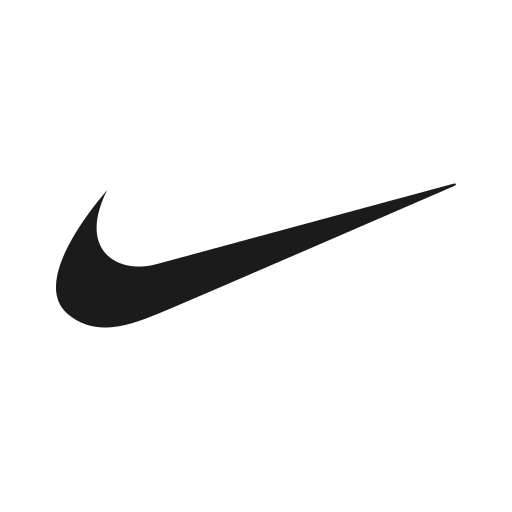

In [ ]:
# @title Load your logo image here

logo_image_url = "https://cdn4.iconfinder.com/data/icons/flat-brand-logo-2/512/nike-512.png"
logo_image = load_image(logo_image_url)
logo_image

  0%|          | 0/20 [00:00<?, ?it/s]

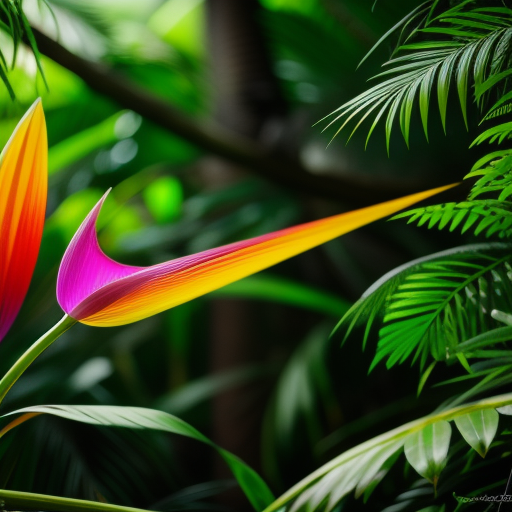

In [32]:

# @title Enter your Prompt and Run

# Describe the prompt for the logo
prompt = "Colorful, jungle surrounding, trees, natural, detailed, hd, 4k, best quality, extremely detailed"
negative_prompt = "nsfw, longbody, lowres, bad anatomy, bad hands, missing fingers, extra digit, fewer digits, cropped, worst quality, low quality"


no_of_steps = 20

# how much would the prompt affect the final output.
# higher guidance scale means more preference given to the prompt.
guidace_scale = 7.0

# how much final output would follow the control image
controlnet_conditioning_scale=1.0

# convert logo image into a control image based on the model
control_image = CONTROLNET_MAPPING[controlnet_type]["hinter"](logo_image )

# run the inference,
my_images = pipe(
    prompt=prompt,
    width=512,
    height=512,
    negative_prompt=negative_prompt,
    image=control_image,
    controlnet_conditioning_scale=controlnet_conditioning_scale,
    num_inference_steps=no_of_steps,
    guidance_scale=guidace_scale,
)

# get first image from the image generations object.
first_image = my_images.images[0]

first_image

<div align="justify" markdown=1>

# Support me

Hey Foks, I am a student who is passionate about GenAI. I created this notebook to share all my learnings from building SuperHeroAI and help others learn and experiment with Stable Diffusion. If you find this notebook useful or interesting, please consider supporting me in any of the following ways:

 - Star this repository on GitHub and share it with your friends and colleagues.
 - Follow me on GitHub and Twitter for more updates and projects.
 - Buy me a coffee

[!["Buy Me A Coffee"](https://www.buymeacoffee.com/assets/img/custom_images/orange_img.png)](https://www.buymeacoffee.com/ayushunleashed)
[![Github](https://img.shields.io/badge/GitHub_Repository-100000?style=for-the-badge&logo=github&logoColor=white)](https://github.com/AyushUnleashed/logo-avatars-pipeline)
[![Twitter URL](https://img.shields.io/twitter/url/https/twitter.com/ayushunleashed.svg?style=social&label=Follow%20%40ayushunleashed)](https://twitter.com/ayushunleashed)

Thank you for your support and feedback! 😊

</div>